#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load Dataset

In [66]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
display(df.head(150))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [67]:
print(df.duplicated().any())
print(df[df.duplicated()])
df = df.drop_duplicates()
print(df.duplicated().any())
print(df[df.duplicated()])

True
     sepal_length  sepal_width  petal_length  petal_width    species
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
142           5.8          2.7           5.1          1.9  virginica
False
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Periksa apakah ada missing values

In [68]:
print(df.isna().any())

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


# Periksa outlier dengan boxplot untuk setiap kolom feature

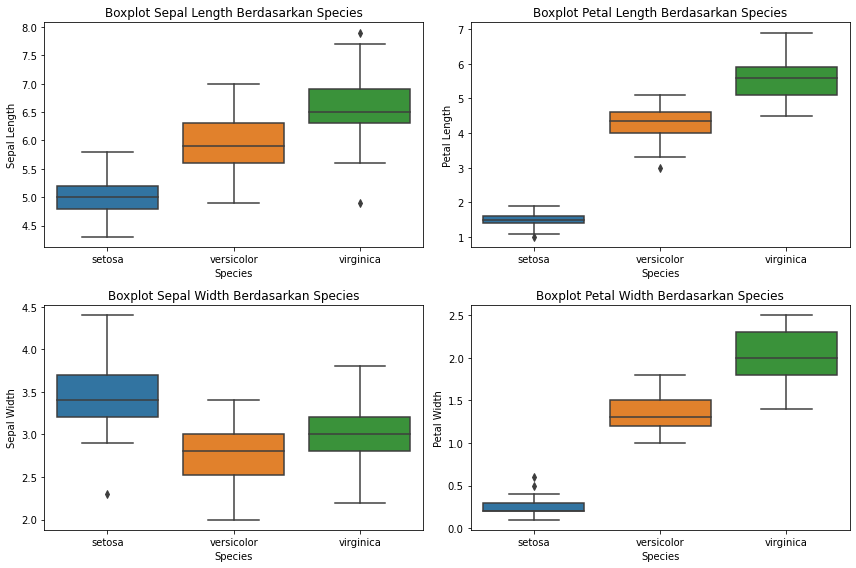

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot 1 - Sepal Length
sns.boxplot(ax=axes[0, 0], x='species', y='sepal_length', data=df)
axes[0, 0].set_xlabel('Species')
axes[0, 0].set_ylabel('Sepal Length')
axes[0, 0].set_title('Boxplot Sepal Length Berdasarkan Species')

# Boxplot 2 - Petal Length
sns.boxplot(ax=axes[0, 1], x='species', y='petal_length', data=df)
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Petal Length')
axes[0, 1].set_title('Boxplot Petal Length Berdasarkan Species')

# Boxplot 3 - Sepal Width
sns.boxplot(ax=axes[1, 0], x='species', y='sepal_width', data=df)
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Sepal Width')
axes[1, 0].set_title('Boxplot Sepal Width Berdasarkan Species')

# Boxplot 4 - Petal Width
sns.boxplot(ax=axes[1, 1], x='species', y='petal_width', data=df)
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Petal Width')
axes[1, 1].set_title('Boxplot Petal Width Berdasarkan Species')

plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [70]:
x = df.drop(['species'], axis = 1)
y = df.species

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit dan transformasi (scaling) pada X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi (scaling) pada X_test
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

LogisticRegression()

Uji model dengan dataset test

In [76]:
y_pred_logreg = logreg.predict(X_test_scaled)
print(y_pred_logreg)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


In [77]:
cm = confusion_matrix(Y_test, y_pred_logreg)
print("Confusion Matrix\n", cm)

accuracy_logreg = accuracy_score(Y_test, y_pred_logreg)
accuracy_logreg = '{:,.4f}'.format(accuracy_logreg)
print(accuracy_logreg)

Confusion Matrix
 [[7 0 0]
 [0 4 0]
 [0 1 3]]
0.9333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [78]:
Gaussian  = GaussianNB()
Gaussian.fit(X_train_scaled, Y_train)

GaussianNB()

Uji hasil model dengan data test

In [79]:
y_pred_gaussian = Gaussian.predict(X_test_scaled)
print(y_pred_gaussian)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [80]:
cm = confusion_matrix(Y_test, y_pred_gaussian)
print("Confusion Matrix\n", cm)

accuracy_gaussian = accuracy_score(Y_test, y_pred_gaussian)
accuracy_gaussian = '{:,.4f}'.format(accuracy_gaussian)
print(accuracy_gaussian)

Confusion Matrix
 [[7 0 0]
 [0 4 0]
 [0 1 3]]
0.9333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [81]:
KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# Latih model K-NN menggunakan data pelatihan yang telah di-scaling
KNN.fit(X_train_scaled, Y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [82]:
y_pred_knn = Gaussian.predict(X_test_scaled)
print(y_pred_knn)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [83]:
cm = confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix\n", cm)

accuracy_knn = accuracy_score(Y_test, y_pred_knn)
accuracy_knn = '{:,.4f}'.format(accuracy_knn)
print(accuracy_knn)

Confusion Matrix
 [[7 0 0]
 [0 4 0]
 [0 1 3]]
0.9333


In [84]:
print("Accuracy Score Logistic Regression :", accuracy_logreg)
print("Accuracy Score Naives Bayes :", accuracy_gaussian)
print("Accuracy Score K-NN Classifier :", accuracy_knn)

Accuracy Score Logistic Regression : 0.9333
Accuracy Score Naives Bayes : 0.9333
Accuracy Score K-NN Classifier : 0.9333


#Kesimpulan
Dari 3 model klasifikasi di atasadalah model klasifikasi dengan akurasi tertinggi karena memiliki accuracy score tertinggi TIDAK ADA karena memiliki nilai yang sama yaitu 0.9333